In [1]:
from masspred_system import two_planet_system, np, plt, ps
import radvalley_definitions as rvdef
%matplotlib inline

In [2]:
# define Kepler-36 planetary system
kep36 = 1
if kep36:
    N = 100
    Xiron_samp = np.random.normal(1/3,.1,N)
    Xiron_samp = Xiron_samp[Xiron_samp>=0]

    tps = two_planet_system(rvdef.define_radval_simple, N, label='Kep36')
    tps.add_star(np.random.normal(1.071,.043,N), np.random.normal(1.626,.019,N), np.random.normal(5911,66,N))
    tps.add_planet(13.83989, np.random.normal(1.486,.035,N), np.random.normal(4.45,.3,N), Xiron_samp)
    tps.add_planet(16.23855, np.random.normal(3.679,.054,N), np.random.normal(8.08,.55,N), Xiron_samp)
    #tps.add_star(1.071, 1.626, 5911)
    #tps.add_planet(13.83989, 1.486, 4.45, 1/3)
    #tps.add_planet(16.23855, 3.679, 8.08, 1/3)

In [3]:
# define LTT 3780 planetary system
ltt3780 = 0
if ltt3780:
    N = 100
    Xiron_samp = np.random.normal(1/3,.1,N)
    Xiron_samp = Xiron_samp[Xiron_samp>=0]

    tps = two_planet_system(rvdef.define_radval_lowmassstar, N, label='ltt3780')
    tps.add_star(np.random.normal(.401,.012,N), np.random.normal(.374,.011,N), np.random.normal(3331,157,N))
    tps.add_planet(.77, np.random.normal(1.33,.075,N), np.random.normal(3.12,.5,N), Xiron_samp, radval_args=[.77])
    tps.add_planet(12.25, np.random.normal(2.3,.16,N), np.random.normal(8.5,1.65,N), Xiron_samp, radval_args=[12.25])

## test photoevaporation scenario

In [4]:
tps.compute_Mgas_min_photoevaporation(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under photoevaporation (100 realizations)



/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:81: RuntimeWarning: divide by zero encountered in log10
  DR_solution = 10**float(fsolve(_solve_Rrcb, np.log10(DR_guess), args=args))
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
  I2_I1 = I2/I1
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  rhorcb *= (3*kappa0 * Mearth2g(Mcore)*Xenv)**(-a)


Time elapsed = 389.7 seconds (6.49 minutes).



/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Gaseous planet measured mass = 8.122 + 0.454 - 0.539 Earth masses
Gaseous planet minimum mass = 5.357 + 0.326 - 0.374 Earth masses
Photoevaporation consistency rate = 1.000


/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


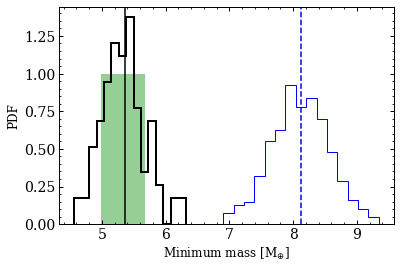

In [5]:
# plot results
mppost = np.random.randn(1000)*tps.planet_gaseous.mass[1] + tps.planet_gaseous.mass[0]
_=plt.hist(mppost, bins=15, histtype='step', color='b', normed=1)
p=plt.hist(tps.photoevaporation.planet_gaseous.Mmin_solution_samples, bins=15, normed=1, histtype='step', color='k', lw=2)
plt.xlabel('Minimum mass [M$_{\oplus}$]', fontsize=12), plt.ylabel('PDF', fontsize=12)
plt.axvline(tps.photoevaporation.planet_gaseous.Mmin_solution[0], color='k')
plt.axvline(tps.photoevaporation.planet_gaseous.mass[0], ls='--', color='b')
plt.fill_between([tps.photoevaporation.planet_gaseous.Mmin_solution[0]-tps.photoevaporation.planet_gaseous.Mmin_solution[2],
                  tps.photoevaporation.planet_gaseous.Mmin_solution[0]+tps.photoevaporation.planet_gaseous.Mmin_solution[1]], 0, 1, alpha=.5)
print('Gaseous planet measured mass = %.3f + %.3f - %.3f Earth masses'%(tps.planet_gaseous.mass))
print('Gaseous planet minimum mass = %.3f + %.3f - %.3f Earth masses'%(tps.photoevaporation.planet_gaseous.Mmin_solution))
print('Photoevaporation consistency rate = %.3f'%tps.photoevaporation.planet_gaseous.frac_consistent_photoevap)

## test core-powered mass loss scenario

In [6]:
tps.compute_Mgas_min_corepoweredmassloss(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under core-powered mass loss (100 realizations)



Time elapsed = 1224.9 seconds (20.42 minutes).


Gaseous planet measured mass = 8.122 + 0.454 - 0.539 Earth masses
Gaseous planet minimum mass = 7.466 + 0.534 - 0.483 Earth masses
Core-powered mass loss consistency rate = 0.800


/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


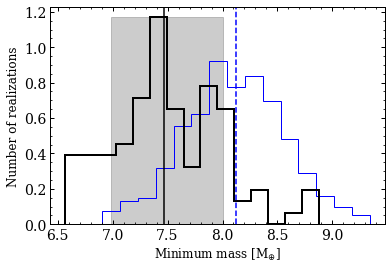

In [7]:
# plot results
_=plt.hist(mppost, bins=15, histtype='step', color='b', normed=1)
p=plt.hist(tps.corepoweredmassloss.planet_gaseous.Mmin_solution_samples, bins=15, histtype='step', color='k', lw=2, normed=1)
plt.xlabel('Minimum mass [M$_{\oplus}$]', fontsize=12), plt.ylabel('Number of realizations', fontsize=12)
plt.axvline(tps.corepoweredmassloss.planet_gaseous.Mmin_solution[0], color='k')
plt.axvline(tps.corepoweredmassloss.planet_gaseous.mass[0], ls='--', color='b')
plt.fill_between([tps.corepoweredmassloss.planet_gaseous.Mmin_solution[0]-tps.corepoweredmassloss.planet_gaseous.Mmin_solution[2],
                  tps.corepoweredmassloss.planet_gaseous.Mmin_solution[0]+tps.corepoweredmassloss.planet_gaseous.Mmin_solution[1]], 0, p[0].max(), color='k', alpha=.2)
print('Gaseous planet measured mass = %.3f + %.3f - %.3f Earth masses'%(tps.planet_gaseous.mass))
print('Gaseous planet minimum mass = %.3f + %.3f - %.3f Earth masses'%(tps.corepoweredmassloss.planet_gaseous.Mmin_solution))
print('Core-powered mass loss consistency rate = %.3f'%tps.corepoweredmassloss.planet_gaseous.frac_consistent_corepoweredmassloss)

## test core-powered mass loss scenario

In [8]:
tps.compute_Mgas_min_gaspoorformation(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under gas-poor formation (100 realizations)



Time elapsed = 5.6 seconds (0.09 minutes).


/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/ryancloutier/anaconda3/envs/my_default/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Gaseous planet measured mass = 8.122 + 0.454 - 0.539 Earth masses
Gaseous planet minimum mass = 4.130 + 0.312 - 0.244 Earth masses
Core-powered mass loss consistency rate = 1.000


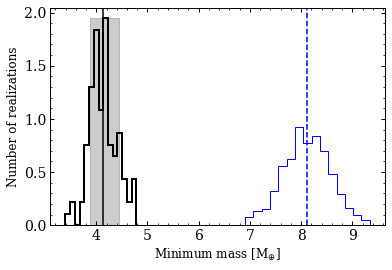

In [9]:
# plot results
_=plt.hist(mppost, bins=15, histtype='step', color='b', normed=1)
p=plt.hist(tps.gaspoorformation.planet_gaseous.Mmin_solution_samples, bins=15, normed=1, histtype='step', color='k', lw=2)
plt.xlabel('Minimum mass [M$_{\oplus}$]', fontsize=12), plt.ylabel('Number of realizations', fontsize=12)
plt.axvline(tps.gaspoorformation.planet_gaseous.Mmin_solution[0], color='k')
plt.axvline(tps.gaspoorformation.planet_gaseous.mass[0], ls='--', color='b')
plt.fill_between([tps.gaspoorformation.planet_gaseous.Mmin_solution[0]-tps.gaspoorformation.planet_gaseous.Mmin_solution[2],
                  tps.gaspoorformation.planet_gaseous.Mmin_solution[0]+tps.gaspoorformation.planet_gaseous.Mmin_solution[1]], 0, p[0].max(), color='k', alpha=.2)
print('Gaseous planet measured mass = %.3f + %.3f - %.3f Earth masses'%(tps.planet_gaseous.mass))
print('Gaseous planet minimum mass = %.3f + %.3f - %.3f Earth masses'%(tps.gaspoorformation.planet_gaseous.Mmin_solution))
print('Core-powered mass loss consistency rate = %.3f'%tps.gaspoorformation.planet_gaseous.frac_consistent_gaspoorformation)